# <span style="color:blue">Lab Case Study - Auto Insurance Company</span>

 #### Table of contents
 
 * [Import and concatenate files](#chapter1)
  
 * [Standardizing header names](#chapter2)
  
 * [Deleting rows](#chapter3)
 
 * [Check the data types](#chapter4)
  
 * [Filtering data and Correcting typos](#chapter5)
  
 * [Removing duplicates](#chapter6)
  
 * [Replacing null values](#chapter7)
  
     * [Customer lifetime value](#chapter7_1)
     * [Income](#chapter7_2)
     * [Monthly premium auto](#chapter7_3)
     * [Number of open complaints](#chapter7_4)
     * [Total claim amount](#chapter7_5)
      
 * [Bucketing the data](#chapter8)
  
 * [Standardizing the data](#chapter9)
  
 * [Data types - Numerical or Categorical?](#chapter10)
  
 * [New information on response and sales channel](#chapter11)
  
 * [Data Visualization](#chapter12)
  
    * [Plot of the total number of responses](#chapter12_1)
    * [Plot of the response rate by the sales channel](#chapter12_2)
    * [Plot of the response rate by the total claim amount](#chapter12_3)
    * [Plot of the response rate by the income](#chapter12_4)
    * [Heatmap](#chapter12_5)  
      
 * [Rechecking and sorting numerical and categorical data](#chapter13)
   
 * [Checking for normal distribution](#chapter14)
   
 * [Multicollinearity](#chapter15)

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import and concatenate files  <a class="anchor" id="chapter1"></a>

In [269]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3a = pd.read_csv('Data/file3.csv')

In [270]:
file3=file3a.rename(columns={'State':'ST', 'Gender':'GENDER'})

file3  #renaming column  headers in file3

#data['Gender'] = list(map(lambda x, y: x if x == x else y, data['Gender'],data['GENDER']))

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [271]:
ai_df = pd.concat([file1,file2,file3], axis=0)  #concatinating file1 + file2 +file3
ai_df_=ai_df.reset_index(drop=True)
ai_df_

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [272]:
ai_df_.isna().sum()

Customer                     2937
ST                           2937
GENDER                       3059
Education                    2937
Customer Lifetime Value      2944
Income                       2937
Monthly Premium Auto         2937
Number of Open Complaints    2937
Policy Type                  2937
Vehicle Class                2937
Total Claim Amount           2937
dtype: int64

## Standardizing header names <a class="anchor" id="chapter2"></a>

In [273]:
def lower_case_column_names(ai_df_):          #function to lower column headers
    ai_df_.columns=[i.lower() for i in ai_df_.columns]
    return ai_df_

In [274]:
lower_case_column_names(ai_df_)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Deleting rows (customer) <a class="anchor" id="chapter3"></a>

In [275]:
def drop_columns(ai_df_) :                  #funtion to drop customer column
    ai_df_.drop(columns=['customer'], inplace=True)
    return ai_df_

In [276]:
drop_columns(ai_df_)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Check the data types<a class="anchor" id="chapter4"></a>
    fix customer lifetime value and number of complaints

In [277]:
ai_df_.dtypes   #see all data types

st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [279]:
ai_df_['customer lifetime value'] =  pd.to_numeric(ai_df_['customer lifetime value'], errors='coerce')  #set customer lifetime value to numeric
ai_df_['number of open complaints'] =  pd.to_numeric(ai_df_['number of open complaints'], errors='coerce')   #set number of open complaints to numeric

In [280]:
ai_df_.dtypes #check if all applied

st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

## Filtering data and Correcting typos<a class="anchor" id="chapter5"></a>
        filter the data in state and gender column to standardize the texts in those columns

In [281]:
print(ai_df_['gender'].unique())   #check for all unique values in gender
ai_df_.gender.value_counts()

[nan 'F' 'M' 'Femal' 'Male' 'female']


F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [242]:
#ai_df_['gender'].replace(['M', 'MALE'], 'Male') #inplace=True  #attempt to try with replace-function
#ai_df_

In [282]:
def clean_gender(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['M', 'MALE', 'Male' ]:
        return 'Male'
    elif x.lower().startswith('f'):
        return 'Female'
    else:
        return 'Unkown'
    

In [283]:
ai_df_['gender'] = list(map(clean_gender, ai_df_['gender'])) 

In [284]:
print(ai_df_['gender'].unique())
ai_df_.gender.value_counts()

[nan 'Female' 'Male']


Female    4607
Male      4408
Name: gender, dtype: int64

In [285]:
ai_df_

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [286]:
print(ai_df_['st'].unique())  #check values for state
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [287]:
def clean_st(x):
    if x !=x:
        return x
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    
    else:
        return x

In [288]:
ai_df_['st'] = list(map(clean_st, ai_df_['st']))   #clean/correct st values

In [289]:
print(ai_df_['st'].unique())     #check st values again
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]


California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

## Removing duplicates<a class="anchor" id="chapter6"></a>

In [290]:
ai_df_.drop_duplicates()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Replacing null values <a class="anchor" id="chapter7"></a>
    Replace missing values with means of the column (for numerical columns)

### Customer lifetime value <a class="anchor" id="chapter7_1"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 8028.803803165787


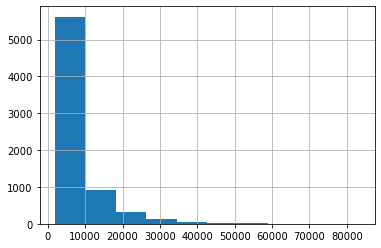

In [291]:

print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())
#print(ai_df_['customer lifetime value'].unique())
print(ai_df_['customer lifetime value'].hist())

mean_customer_lifetime_value = np.mean(ai_df_['customer lifetime value'])

print('mean:',mean_customer_lifetime_value)

AxesSubplot(0.125,0.125;0.775x0.755)
Number of NaNs: 0


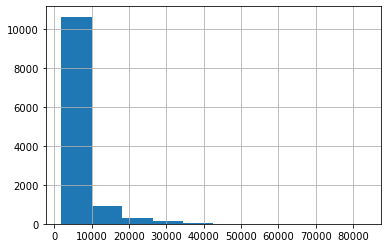

In [292]:
ai_df_['customer lifetime value'] = ai_df_['customer lifetime value'].fillna(mean_customer_lifetime_value)  #fillna (fill NaN) with mean

print(ai_df_['customer lifetime value'].hist())
print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())

### Income <a class="anchor" id="chapter7_2"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 37828.820291124


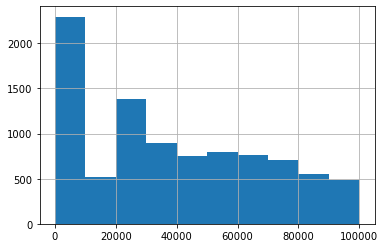

In [293]:
print('Number of NaNs:', ai_df_['income'].isna().sum())
#print(ai_df_['income'].unique())
print(ai_df_['income'].hist())

mean_income = np.mean(ai_df_['income'])

print('mean:', mean_income)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


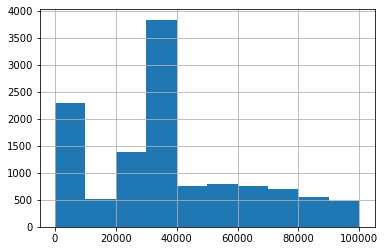

In [294]:
ai_df_['income'] = ai_df_['income'].fillna(mean_income)

print('Number of NaNs:', ai_df_['income'].isna().sum())
print(ai_df_['income'].hist())

### Monthly premium auto <a class="anchor" id="chapter7_3"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 110.3912662799606


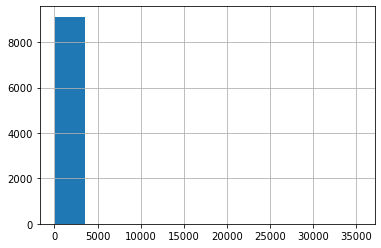

In [295]:
print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
#print(ai_df_['monthly premium auto'].unique()) 
print(ai_df_['monthly premium auto'].hist())    #outlier: 35353.0

mean_monthly_premium_auto = np.mean(ai_df_['monthly premium auto'])

print('mean:', mean_monthly_premium_auto)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


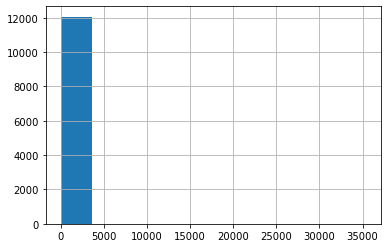

In [296]:
ai_df_['monthly premium auto'] = ai_df_['monthly premium auto'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
print(ai_df_['monthly premium auto'].hist())

### Number of open complaints <a class="anchor" id="chapter7_4"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 0.384


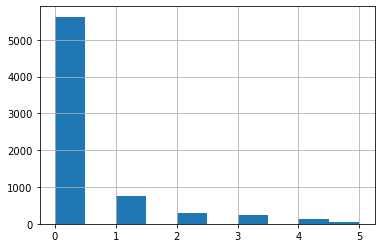

In [297]:
print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
#print(ai_df_['number of open complaints'].unique())
print(ai_df_['number of open complaints'].hist())

mean_number_of_open_complaints = round(np.mean(ai_df_['number of open complaints']), 3)
print('mean:',mean_number_of_open_complaints)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


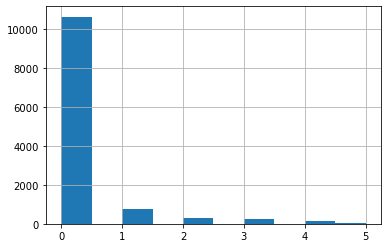

In [298]:
ai_df_['number of open complaints'] = ai_df_['number of open complaints'].fillna(mean_number_of_open_complaints)

print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
print(ai_df_['number of open complaints'].hist())

### Total claim amount <a class="anchor" id="chapter7_5"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 430.5271400681818


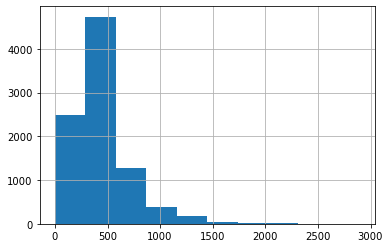

In [299]:
print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
#print(ai_df_['total claim amount'].unique())
print(ai_df_['total claim amount'].hist())

mean_total_claim_amount = np.mean(ai_df_['total claim amount'])
print('mean:',mean_total_claim_amount)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


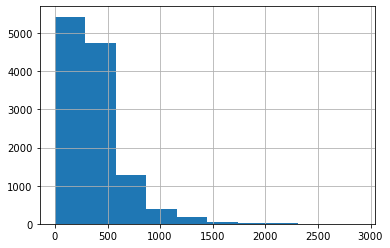

In [300]:
ai_df_['total claim amount'] = ai_df_['total claim amount'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
print(ai_df_['total claim amount'].hist())

#### Check in complete data for NaN

In [301]:
ai_df_.isna().sum()   #check for count of NaN values

st                           2937
gender                       3059
education                    2937
customer lifetime value         0
income                          0
monthly premium auto            0
number of open complaints       0
policy type                  2937
vehicle class                2937
total claim amount              0
dtype: int64

In [302]:
ai_df_.describe()  #check for data stats

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000
mean,8028.803803,37828.820291,110.391266,0.384176,352.654102
std,5312.295534,26409.114946,505.740308,0.700656,286.924004
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,5279.143178,21585.250000,71.000000,0.000000,110.391266
50%,8028.803803,37828.820291,101.000000,0.384000,312.000000
75%,8028.803803,53301.750000,110.391266,0.384000,494.345486
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


## Bucketing the data<a class="anchor" id="chapter8"></a>
    Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

<AxesSubplot:>

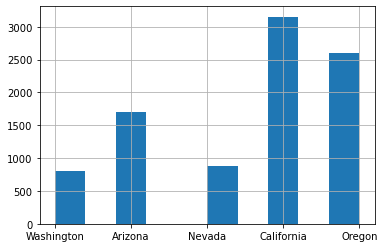

In [303]:
ai_df_.st.hist() 

In [304]:
def bucket_st(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['California', 'West Region']:
        return 'West Region'
    elif x in ['Oregon', 'North West']:
        return 'North West'
    elif x in ['Washington', 'East']:
        return 'East'
    elif x in ['Arizona','Nevada', 'Central']:
        return 'Central'
    else:
        return 'Other'
    

In [305]:
ai_df_['st binned'] = ai_df_['st'].apply(bucket_st)  #apply function on data 'st' to group into 'st binned' (new column)


# sort columns
ai_df_=ai_df_[['st', 'st binned','gender', 'education', 'income', 'policy type', 'vehicle class','customer lifetime value', 'monthly premium auto', 'number of open complaints', 'total claim amount']]
ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,Washington,East,NaN,Master,0.0,Personal Auto,Four-Door Car,8028.803803,1000.0,0.384,2.704934
1,Arizona,Central,Female,Bachelor,0.0,Personal Auto,Four-Door Car,8028.803803,94.0,0.384,1131.464935
2,Nevada,Central,Female,Bachelor,48767.0,Personal Auto,Two-Door Car,8028.803803,108.0,0.384,566.472247
3,California,West Region,Male,Bachelor,0.0,Corporate Auto,SUV,8028.803803,106.0,0.384,529.881344
4,Washington,East,Male,High School or Below,36357.0,Personal Auto,Four-Door Car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,California,West Region,Male,Bachelor,71941.0,Personal Auto,Four-Door Car,23405.987980,73.0,0.000,198.234764
12070,California,West Region,Female,College,21604.0,Corporate Auto,Four-Door Car,3096.511217,79.0,0.000,379.200000
12071,California,West Region,Male,Bachelor,0.0,Corporate Auto,Four-Door Car,8163.890428,85.0,3.000,790.784983
12072,California,West Region,Male,College,21941.0,Personal Auto,Four-Door Car,7524.442436,96.0,0.000,691.200000


## Standardizing the data<a class="anchor" id="chapter9"></a>
    Use string functions to standardize the text data (lower case)

In [162]:
ai_df_.dtypes  ##checking which data types are strings

st                            object
st binned                     object
gender                        object
education                     object
income                       float64
policy type                   object
vehicle class                 object
customer lifetime value      float64
monthly premium auto         float64
number of open complaints    float64
total claim amount           float64
dtype: object

In [163]:
##setting all string data columns lower case

for col in ['st', 'st binned', 'gender','education', 'policy type', 'vehicle class']:
    ai_df_[col]=ai_df_[col].str.lower()


#ai_df_['st']=ai_df_['st'].str.lower()
#ai_df_['st binned'].str.lower().inplace=True
#ai_df_['gender'].str.lower()
#ai_df_['education'].str.lower()
#ai_df_['policy type'].str.lower()
#ai_df_['vehicle class'].str.lower()

ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,washington,east,NaN,master,0.0,personal auto,four-door car,8028.803803,1000.0,0.384,2.704934
1,arizona,central,female,bachelor,0.0,personal auto,four-door car,8028.803803,94.0,0.384,1131.464935
2,nevada,central,female,bachelor,48767.0,personal auto,two-door car,8028.803803,108.0,0.384,566.472247
3,california,west region,male,bachelor,0.0,corporate auto,suv,8028.803803,106.0,0.384,529.881344
4,washington,east,male,high school or below,36357.0,personal auto,four-door car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,california,west region,male,bachelor,71941.0,personal auto,four-door car,23405.987980,73.0,0.000,198.234764
12070,california,west region,female,college,21604.0,corporate auto,four-door car,3096.511217,79.0,0.000,379.200000
12071,california,west region,male,bachelor,0.0,corporate auto,four-door car,8163.890428,85.0,3.000,790.784983
12072,california,west region,male,college,21941.0,personal auto,four-door car,7524.442436,96.0,0.000,691.200000


## Data types - Numerical or Categorical?<a class="anchor" id="chapter10"></a>

In [164]:
ai_df_numeric = ai_df_._get_numeric_data()

In [165]:
list(ai_df_numeric)

['income',
 'customer lifetime value',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount']

In [166]:
ai_df_categoric = [col for col in ai_df_.columns if ai_df_[col].dtype=="O"]

In [167]:
list(ai_df_categoric)

['st', 'st binned', 'gender', 'education', 'policy type', 'vehicle class']

## New information on response and sales channel<a class="anchor" id="chapter11"></a>

In [168]:
new_df_= pd.read_csv('Data\customer_analayiss_case_study_with_response.csv')

In [169]:
new_df=new_df_.reset_index(drop=True)
new_df

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [170]:
def drop_columns(new_df) :                  #funtion to drop customer column
    new_df.drop(columns=['Unnamed: 0'], inplace=True)
    return new_df

In [171]:
new_df=drop_columns(new_df)

In [172]:
##setting all string data columns lower case

for col in ['state', 'gender','education', 'policy type', 'vehicle class', 'sales channel', 'response']:
    new_df[col]=new_df[col].str.lower()

new_df

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,arizona,4809.216960,college,m,48029,61,0.0,corporate auto,292.800000,four-door car,agent,no
1,california,2228.525238,college,f,0,64,0.0,personal auto,744.924331,four-door car,call center,no
2,washington,14947.917300,bachelor,m,22139,100,0.0,personal auto,480.000000,suv,call center,no
3,oregon,22332.439460,college,m,49078,97,0.0,corporate auto,484.013411,four-door car,branch,yes
4,oregon,9025.067525,bachelor,f,23675,117,NaN,personal auto,707.925645,four-door car,branch,no
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,bachelor,f,0,253,NaN,personal auto,1214.400000,luxury car,web,no
10906,oregon,5259.444853,college,f,61146,65,0.0,personal auto,273.018929,four-door car,branch,no
10907,arizona,23893.304100,bachelor,f,39837,201,0.0,corporate auto,381.306996,luxury suv,web,no
10908,california,11971.977650,college,f,64195,158,4.0,personal auto,618.288849,suv,branch,no


In [173]:
new_df.dtypes 

state                         object
customer lifetime value      float64
education                     object
gender                        object
income                         int64
monthly premium auto           int64
number of open complaints    float64
policy type                   object
total claim amount           float64
vehicle class                 object
sales channel                 object
response                      object
dtype: object

## Data Visualization<a class="anchor" id="chapter12"></a>

In [306]:
# import libraries to visualize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Plot of the total number of responses <a class="anchor" id="chapter12_1"></a>

[Text(0, 0.5, 'Count of (non)response')]

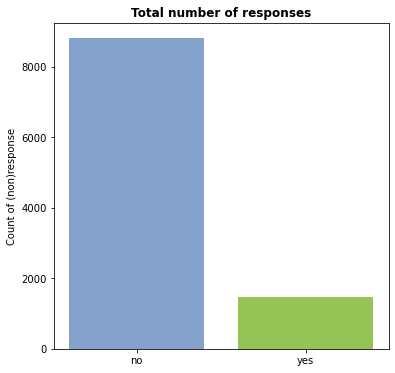

In [307]:
responded = new_df['response'].value_counts()
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

# create figure and axes
fig1, ax1 = plt.subplots(1,1,figsize = (6,6))

# set title
ax1.set_title('Total number of responses', fontweight='bold')

# plot the bar chart
ax1.bar(responded.index, responded, color=('#85a2cc','#96c355'))

ax1.set(ylabel='Count of (non)response')


In [308]:
sns.countplot(new_df, x='response', palette=palette1, hue='sales channel')  ##optional plot

C:\Users\ingae\anaconda3\envs\DA_Envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'sales channel'

### Plot of the response rate by the sales channel <a class="anchor" id="chapter12_2"></a>

In [177]:
new_df['response2'] = new_df['response'] #duplicate response column (QUESTION:any possibility to do without?)

channel_response = new_df.groupby(['sales channel','response2'])['response'].count().reset_index()
channel_response

,sales channel,response2,response
0,agent,no,3148
1,agent,yes,742
2,branch,no,2539
3,branch,yes,326
4,call center,no,1792
5,call center,yes,221
6,web,no,1334
7,web,yes,177


<AxesSubplot:title={'center':'Response Rate by sales channel'}, xlabel='sales channel', ylabel='response'>

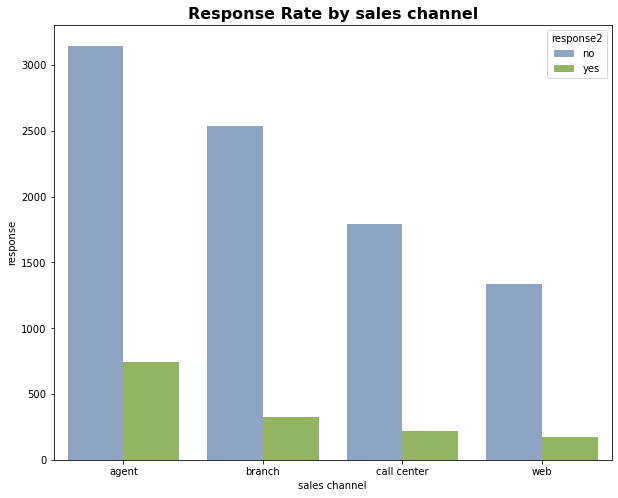

In [178]:
#set the color palette, which means that a preset palette of colors will be used in the upcoming graphs
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

fig2, ax2 = plt.subplots(figsize = (10,8))
ax2.set_title('Response Rate by sales channel', size='16', fontweight='bold')

sns.barplot(x = channel_response['sales channel'],y = channel_response['response'], hue = channel_response['response2'], ax = ax2, orient='v',palette=palette1)
## hue - adding 3rd dimension (without only one bar per x-value)

### Plot of the response rate by the total claim amount <a class="anchor" id="chapter12_3"></a>

In [179]:

#response_yes=[new_df[new_df['response'] == 'yes']]  #filtering data for response yes

#distribution plot, rain cloud plot 

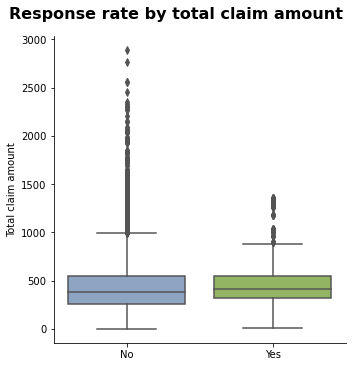

In [180]:
fg3 = sns.catplot(x='response', y = 'total claim amount', data = new_df,  kind="box", palette=palette1)
fg3.fig.suptitle('Response rate by total claim amount', size='16', fontweight='bold', y = 1.05)
fg3.set_xticklabels(['No', 'Yes'])
fg3.set_ylabels('Total claim amount')
fg3.set_xlabels('')

### Plot of the response rate by income <a class="anchor" id="chapter12_4"></a>

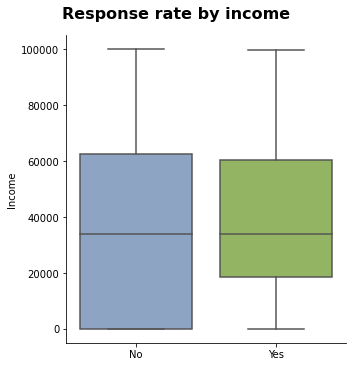

In [181]:
fg4 = sns.catplot(x='response', y = 'income', data = new_df,  kind="box", palette=palette1)
fg4.fig.suptitle('Response rate by income', size='16', fontweight='bold', y = 1.05)
fg4.set_xticklabels(['No', 'Yes'])
fg4.set_ylabels('Income')
fg4.set_xlabels('')

### Correlation Heatmap <a class="anchor" id="chapter12_5"></a>

<AxesSubplot:>

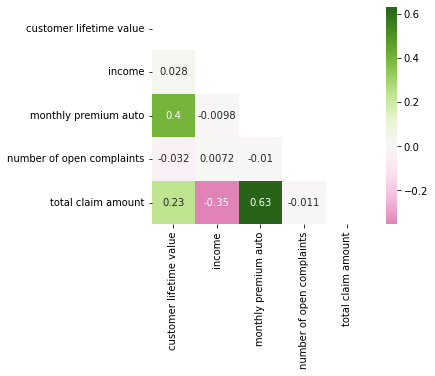

In [309]:
corr = new_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="PiYG", mask=mask, square=True, center=0)

## Rechecking and sorting numerical and categorical data<a class="anchor" id="chapter13"></a>

In [310]:
new_df_numeric = new_df._get_numeric_data()
#list(new_df_numeric)
new_df_numeric

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,4809.216960,48029,61,0.0,292.800000
1,2228.525238,0,64,0.0,744.924331
2,14947.917300,22139,100,0.0,480.000000
3,22332.439460,49078,97,0.0,484.013411
4,9025.067525,23675,117,NaN,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,NaN,1214.400000
10906,5259.444853,61146,65,0.0,273.018929
10907,23893.304100,39837,201,0.0,381.306996
10908,11971.977650,64195,158,4.0,618.288849


In [311]:
new_df_categoric = [col for col in new_df.columns if new_df[col].dtype=="O"]
list(new_df_categoric)

['state',
 'education',
 'gender',
 'policy type',
 'vehicle class',
 'sales channel',
 'response',
 'response2']

## Checking for normal distribution<a class="anchor" id="chapter14"></a>

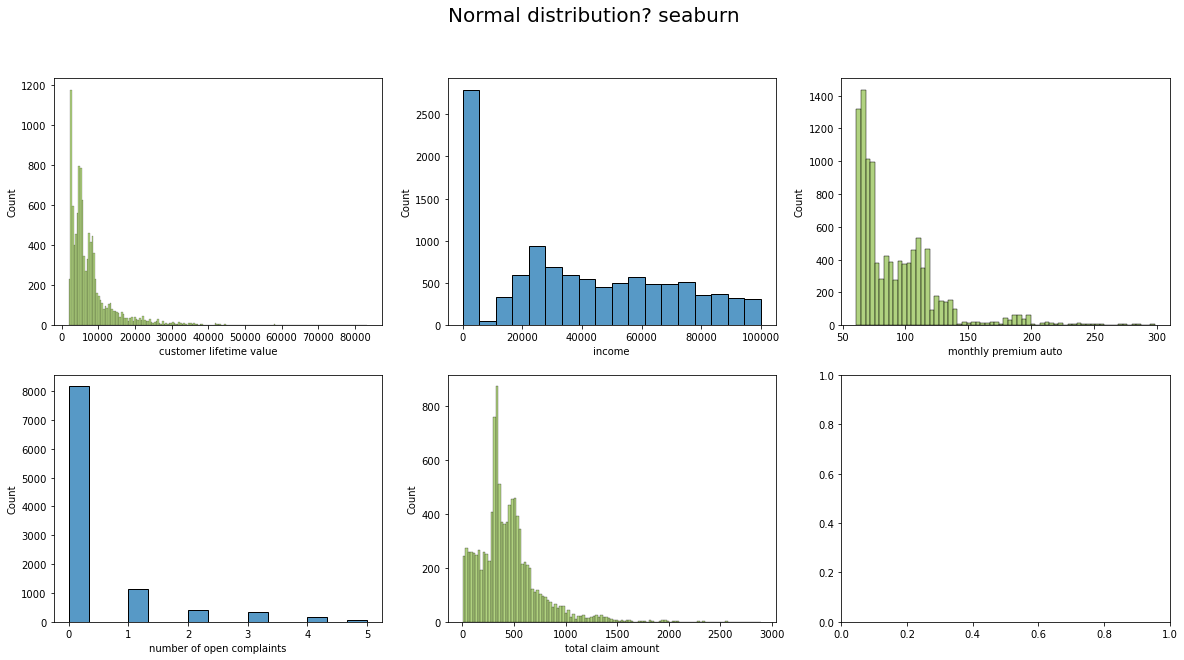

In [76]:
# create the figure and axes
fig5,axes5 = plt.subplots(2,3,figsize = (20,10))


fig5.suptitle('Normal distribution? seaburn', fontsize=20)

# use sns.histplot as distplot will replaced
fg5 = sns.histplot(new_df_numeric['customer lifetime value'], ax=axes5[0,0], color="#96c355")
fg5 = sns.histplot(new_df_numeric['income'], ax=axes5[0,1])
fg5 = sns.histplot(new_df_numeric['monthly premium auto'], ax=axes5[0,2], color="#96c355")
fg5 = sns.histplot(new_df_numeric['number of open complaints'], ax=axes5[1,0])
fg5 = sns.histplot(new_df_numeric['total claim amount'], ax=axes5[1,1], color="#96c355")

Text(0.5, 1.0, 'Histogram of customer lifetime value')

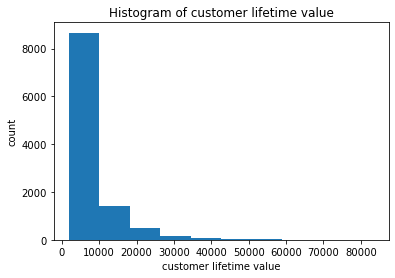

In [77]:
# use matplotlib.pyplot.hist      (QUESTION: Is there a way of also displaying plt.histo on a canvas (as above)?)
fig6=plt.hist(new_df_numeric['customer lifetime value'], label='customer lifetime value')
plt.xlabel('customer lifetime value')
plt.ylabel('count')
plt.title('Histogram of customer lifetime value')

Text(0.5, 1.0, 'Histogram of income')

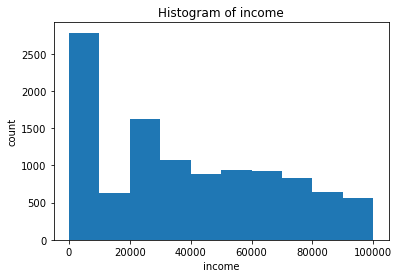

In [78]:
fig7 = plt.hist(new_df_numeric['income'], label='income')
plt.xlabel('income')
plt.ylabel('count')
plt.title('Histogram of income')

Text(0.5, 1.0, 'Histogram of monthly premium auto')

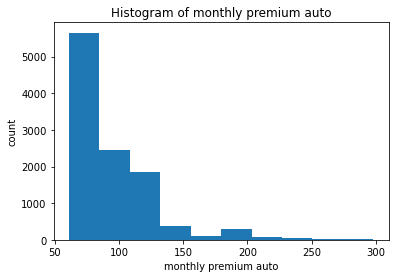

In [79]:
fig8 = plt.hist(new_df_numeric['monthly premium auto'], label='monthly premium auto')
plt.xlabel('monthly premium auto')
plt.ylabel('count')
plt.title('Histogram of monthly premium auto')

Text(0.5, 1.0, 'Histogram of number of open complaints')

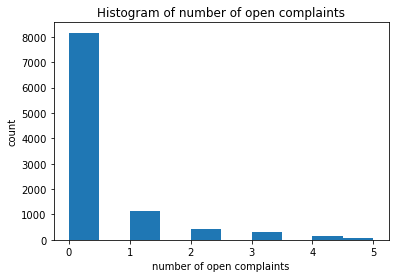

In [80]:
fig9= plt.hist(new_df_numeric['number of open complaints'], label='number of open complaints')
plt.xlabel('number of open complaints')
plt.ylabel('count')
plt.title('Histogram of number of open complaints')

Text(0.5, 1.0, 'Histogram of total claim amount')

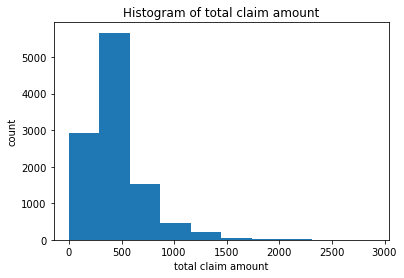

In [81]:
fig10 = plt.hist(new_df_numeric['total claim amount'], label='total claim amount')
plt.xlabel('total claim amount')
plt.ylabel('count')
plt.title('Histogram of total claim amount')

## Multicollinearity<a class="anchor" id="chapter15"></a>

- increasing Multicollinearity leads to:
    + instability of the models estimation of regression coefficiants
    + hence the asseritions of the regression coefficient will be increasingly inaccurate
    + an unambiguous model interpretation      

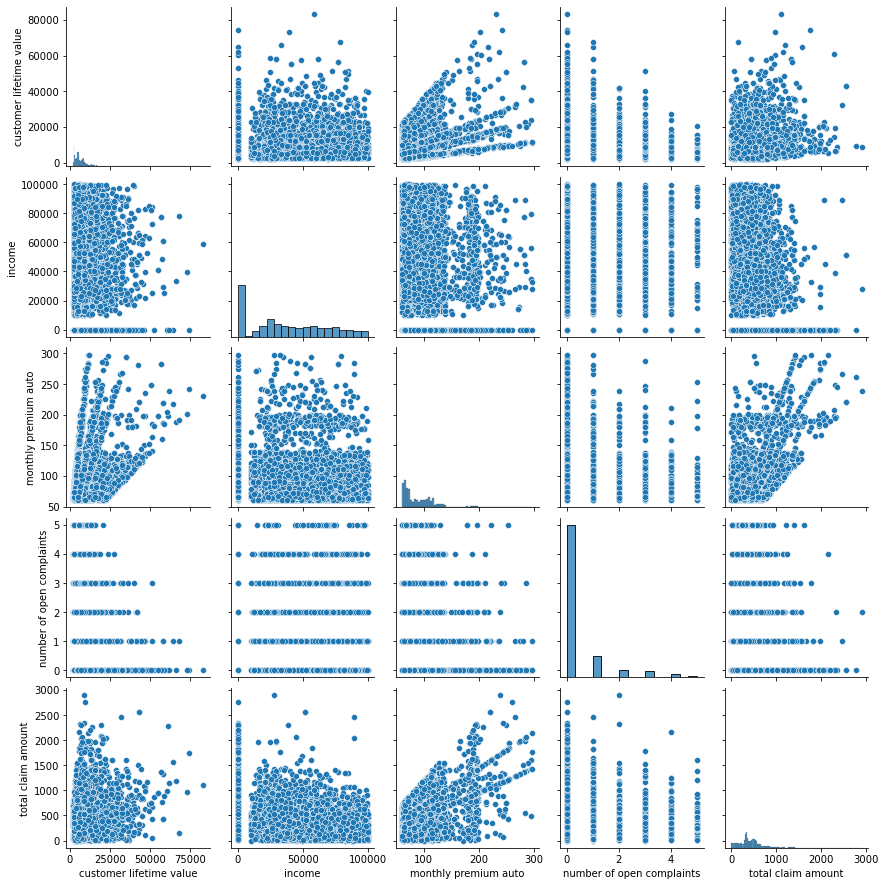

In [82]:
sns.pairplot(new_df_numeric) 

In [83]:
#funtion to drop 'total claim amount' column as propable colinearity to 'monthly premium auto'

def drop_columns(new_df_numeric) :                  
    new_df_numeric.drop(columns=['monthly premium auto'], inplace=True)
    return new_df_numeric

In [84]:
new_df_numeric_mpa=drop_columns(new_df_numeric)   #why deletion also on new_df or without inplace=True, not at all

In [85]:
new_df_numeric_mpa

,customer lifetime value,income,number of open complaints,total claim amount
0,4809.216960,48029,0.0,292.800000
1,2228.525238,0,0.0,744.924331
2,14947.917300,22139,0.0,480.000000
3,22332.439460,49078,0.0,484.013411
4,9025.067525,23675,NaN,707.925645
...,...,...,...,...
10905,15563.369440,0,NaN,1214.400000
10906,5259.444853,61146,0.0,273.018929
10907,23893.304100,39837,0.0,381.306996
10908,11971.977650,64195,4.0,618.288849


### Seaburn Heatmap without 'monthly premium auto' column

<AxesSubplot:>

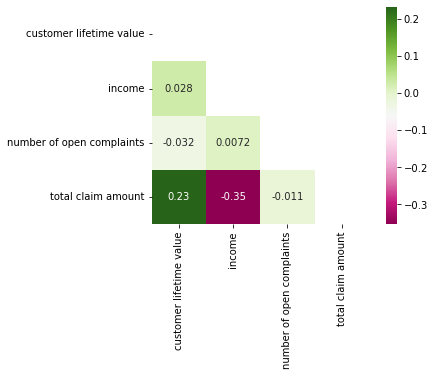

In [267]:
#sns.heatmap(new_df_numeric_mpa.corr(), annot=True, cmap="PiYG")  

corr = new_df_numeric_mpa.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="PiYG", mask=mask, square=True)

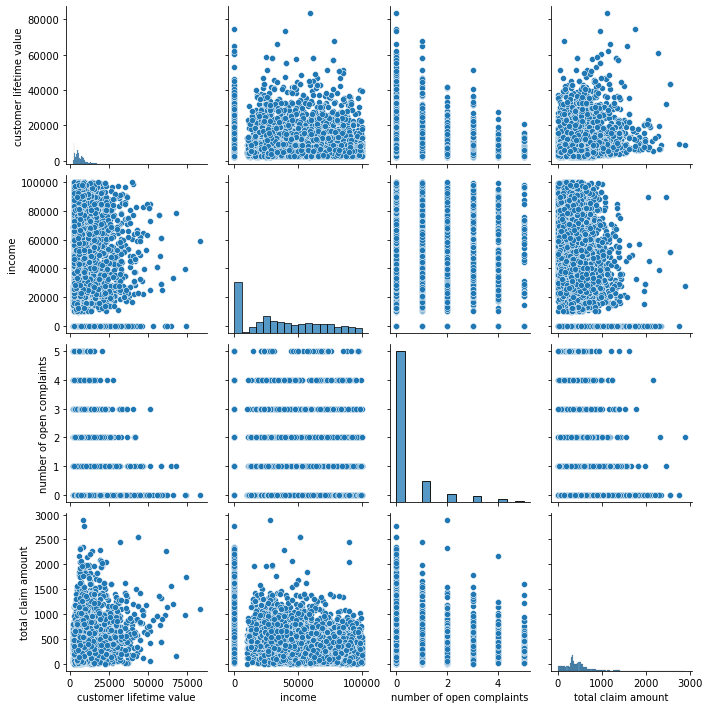

In [87]:
sns.pairplot(new_df_numeric_mpa) 

In [266]:
import IPython
url = "https://c.tenor.com/wT6b-wB22RYAAAAC/dave-grohl-wine.gif"
#src= "Data/dave-grohl-wine.gif"
iframe = '<iframe src=' + url + ' width=260 height=200></iframe>'
IPython.display.HTML(iframe)